In [29]:
#!pip install pandas
# !pip install -r requirements.txt
#!pip install ydata-profiling

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

In [31]:
dataset = pd.read_csv("data\Depression Student Dataset.csv")
dataset

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pghat\AppData\Local\Temp\ipykernel_19000\3410363736.py:1: SyntaxWarning: invalid escape sequence '\D'
  dataset = pd.read_csv("data\Depression Student Dataset.csv")


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [33]:
dataset.shape

(502, 11)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [32]:
dataset.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [43]:
dataset.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [44]:
dataset.dropna(inplace = True)
dataset.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [48]:
dataset.Gender.value_counts()

Gender
Male      267
Female    235
Name: count, dtype: int64

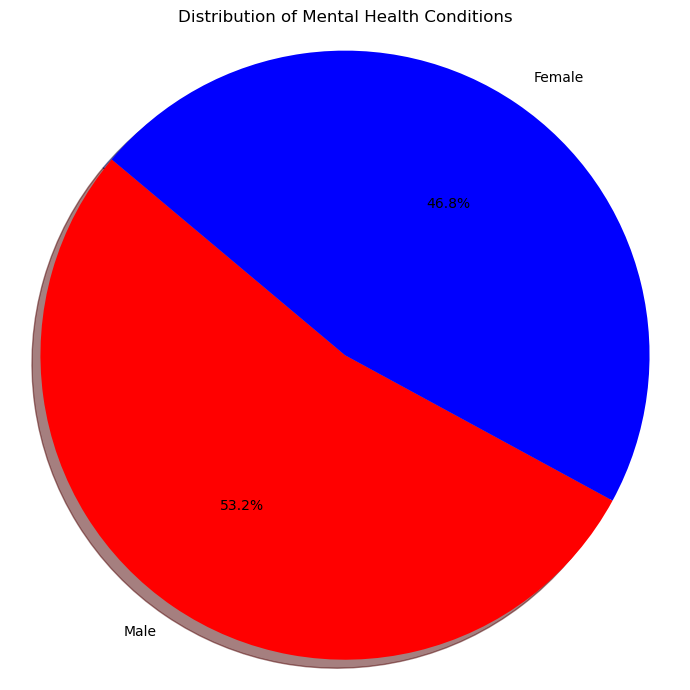

In [50]:
# Count the occurrences of each category
status_counts = dataset['Gender'].value_counts()

# Define colors for each category (7 colors)
colors = ['#FF0000', '#0000FF']
##colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

In [66]:
!pip install wordcloud
!pip install pillow
import random
print(random.random())


from wordcloud import WordCloud
import matplotlib.pyplot as plt


0.8718567582854211


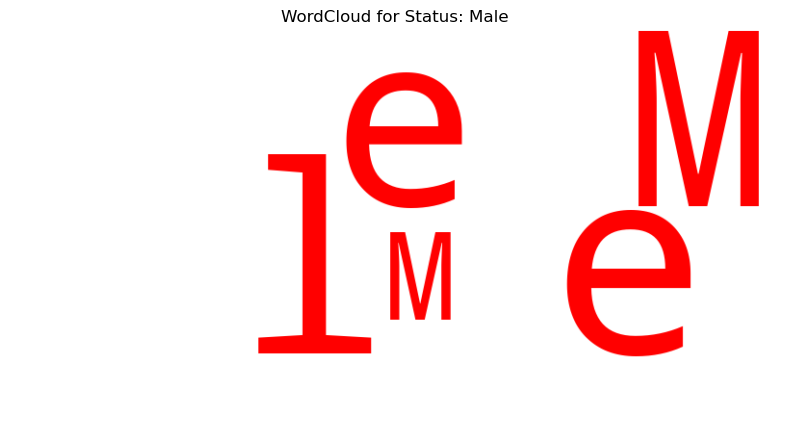

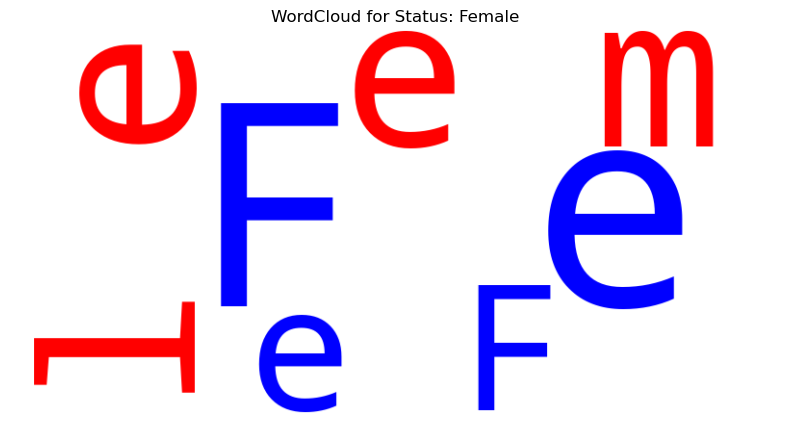

In [76]:
# Get unique categories in 'status'
statuses = dataset['Gender'].unique()

# Define a color function
def color_func(word, font_size, position, orientation, random_state=101, **kwargs):
    return random.choice(colors)

# Generate and plot the WordCloud for each category
for status in statuses:
    # Filter the tokens data for the current status
    tokens_data = ' '.join(dataset[dataset['Gender'] == status]['Gender'].dropna().apply(lambda x: ' '.join(x)).tolist())

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.title(f'WordCloud for Status: {status}')
    plt.show()

In [86]:
dataset.describe()[1:].T.style.background_gradient(cmap='mako', axis=1)


,mean,std,min,25%,50%,75%,max
Age,26.241036,4.896501,18.000000,22.000000,26.500000,30.000000,34.000000
Academic Pressure,3.003984,1.390007,1.000000,2.000000,3.000000,4.000000,5.000000
Study Satisfaction,3.075697,1.373490,1.000000,2.000000,3.000000,4.000000,5.000000
Study Hours,6.404382,3.742434,0.000000,3.000000,7.000000,10.000000,12.000000
Financial Stress,2.928287,1.425053,1.000000,2.000000,3.000000,4.000000,5.000000


In [91]:
df1 = ['Age','Academic Pressure','Study Satisfaction','Study Hours','Financial Stress']
dataset[df1].corr().T.style.background_gradient(cmap='mako', axis=1)

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
Age,1.000000,0.027132,-0.005093,0.050112,-0.095348
Academic Pressure,0.027132,1.000000,-0.101571,0.053024,0.003168
Study Satisfaction,-0.005093,-0.101571,1.000000,-0.014122,-0.038012
Study Hours,0.050112,0.053024,-0.014122,1.000000,0.015554
Financial Stress,-0.095348,0.003168,-0.038012,0.015554,1.000000


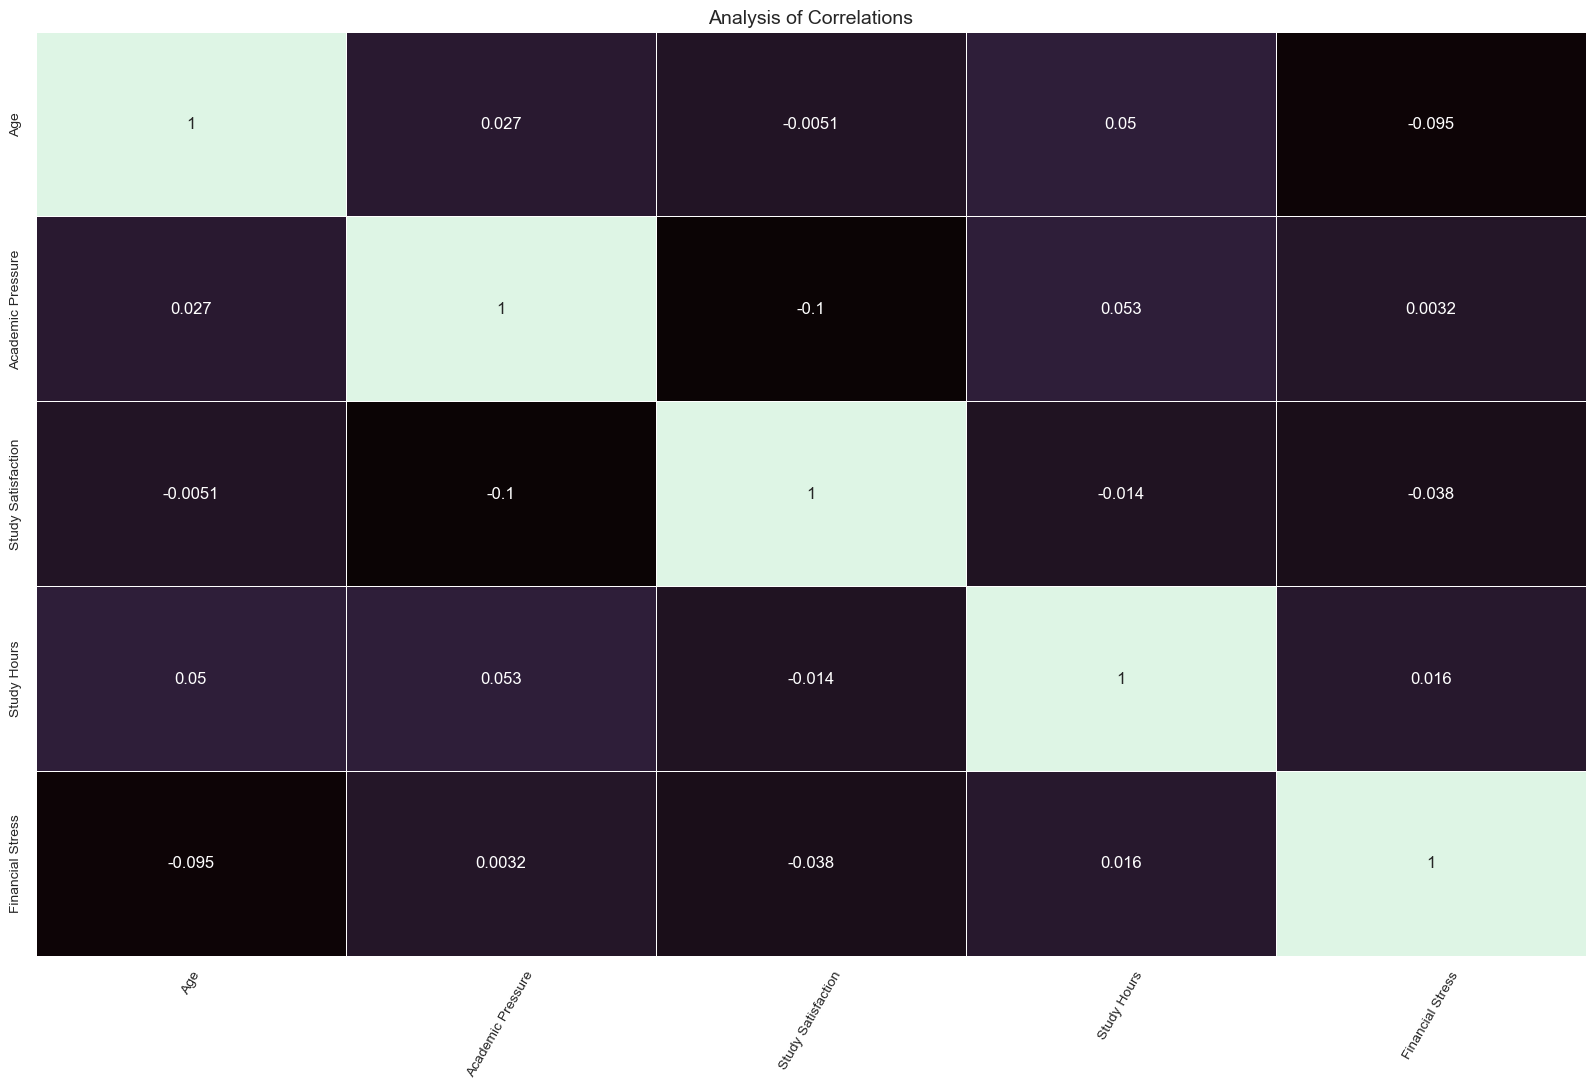

In [93]:
def correlated_map(dataframe, plot=False):
    corr = dataset[df1].corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="mako", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(dataset, plot=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

<Axes: >

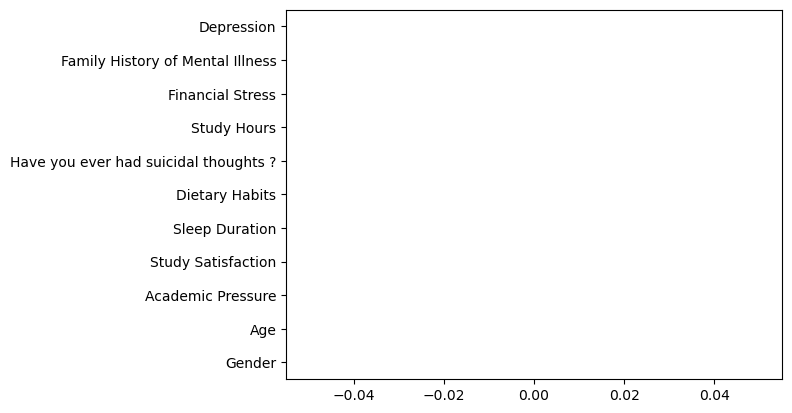

In [35]:
dataset.isnull().sum().sort_values(ascending=False).plot(kind='barh')

C:\Users\pghat\AppData\Local\Temp\ipykernel_19000\2048846144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=dataset, palette='viridis')


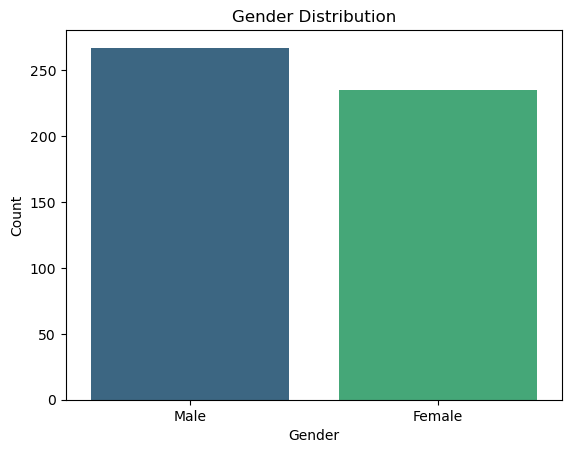

In [7]:
# Gender distribution
sns.countplot(x='Gender', data=dataset, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

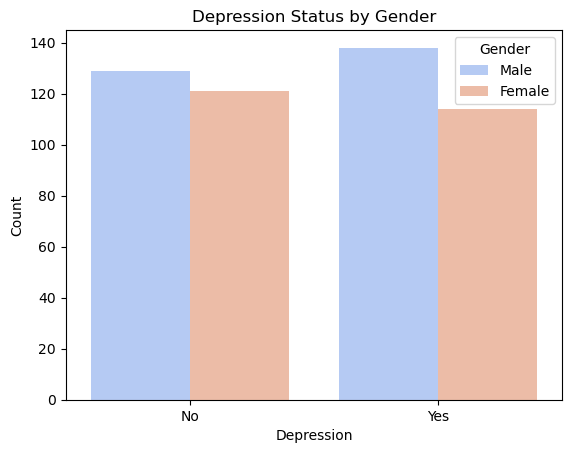

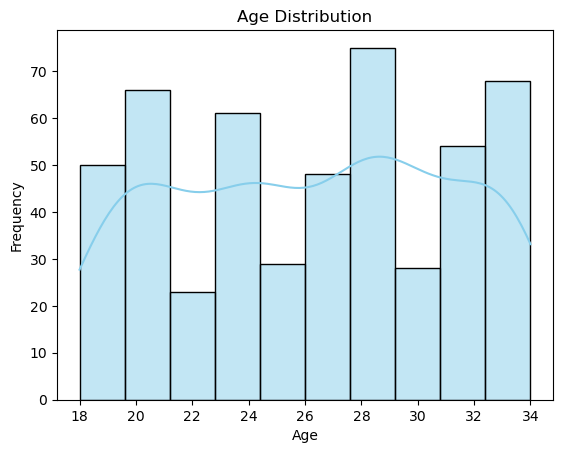

In [8]:
# Depression by gender
sns.countplot(x='Depression', hue='Gender', data=dataset, palette='coolwarm')
plt.title('Depression Status by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

# Age distribution
sns.histplot(data=dataset, x="Age", kde=True, bins=10, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\pghat\AppData\Local\Temp\ipykernel_19000\2420458317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Academic Pressure', data=dataset, palette='pastel')


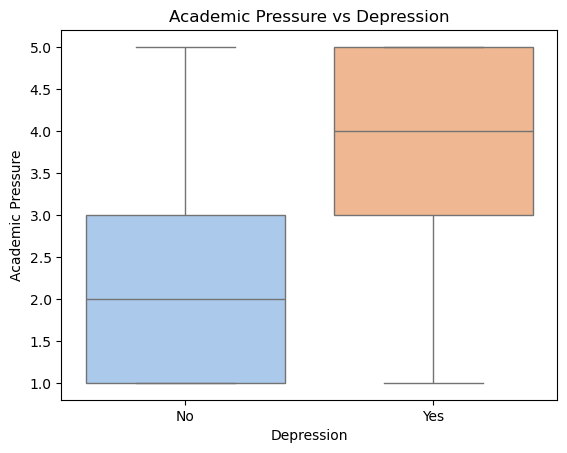

In [9]:
sns.boxplot(x='Depression', y='Academic Pressure', data=dataset, palette='pastel')
plt.title('Academic Pressure vs Depression')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.show()

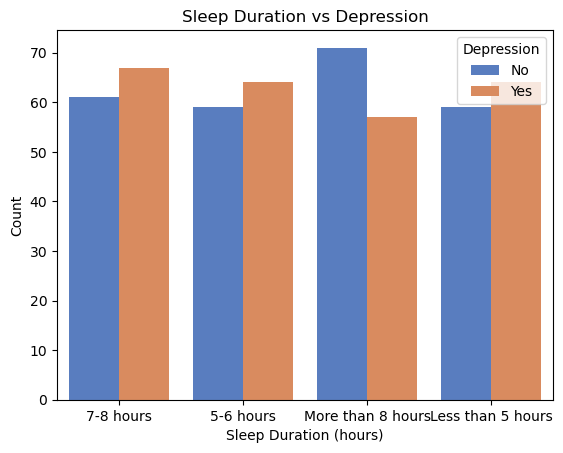

In [10]:
# Sleep duration and depression
sns.countplot(x='Sleep Duration', hue='Depression', data=dataset, palette='muted')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.show()

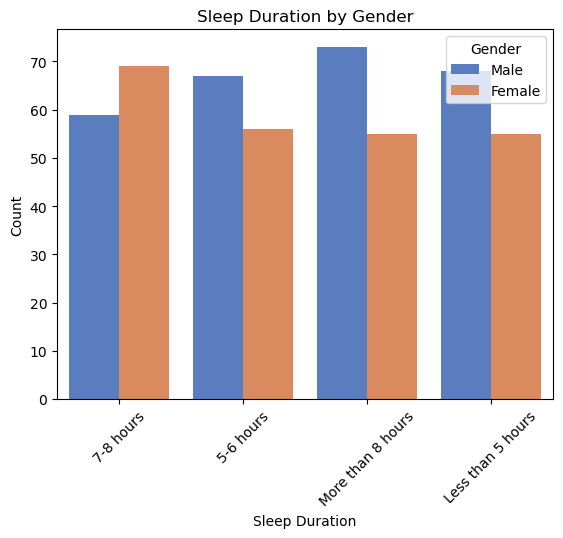

In [11]:
# Sleep Duration grouped by Gender
sns.countplot(data=dataset, x="Sleep Duration", hue="Gender", palette="muted")
plt.title("Sleep Duration by Gender")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

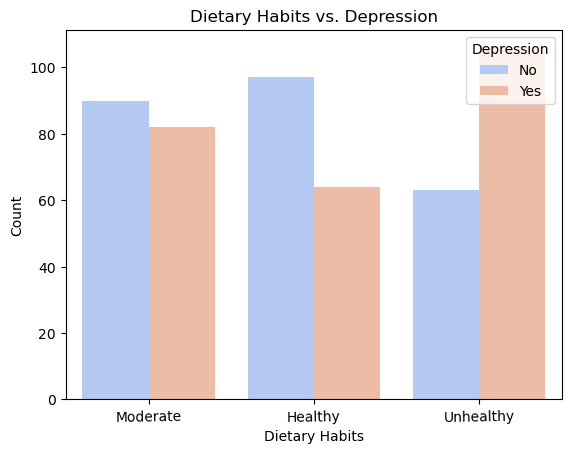

In [12]:
# Dietary Habits vs. Depression
sns.countplot(data=dataset, x="Dietary Habits", hue="Depression", palette="coolwarm")
plt.title("Dietary Habits vs. Depression")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.xticks(rotation=1)
plt.show()

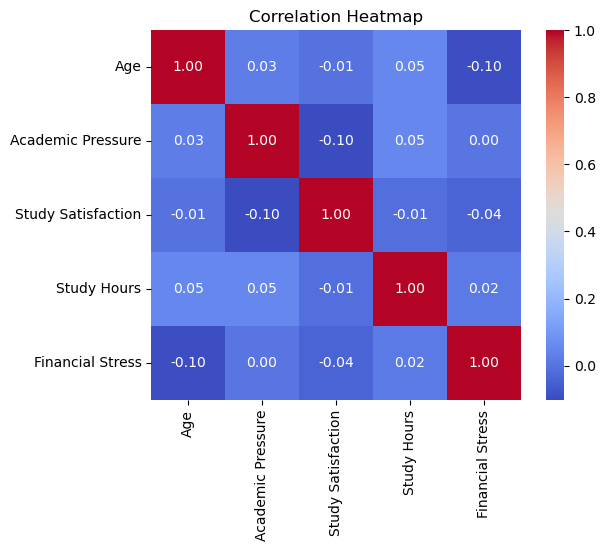

In [13]:
# Correlation heatmap for numerical columns
numerical_cols = dataset.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = dataset[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

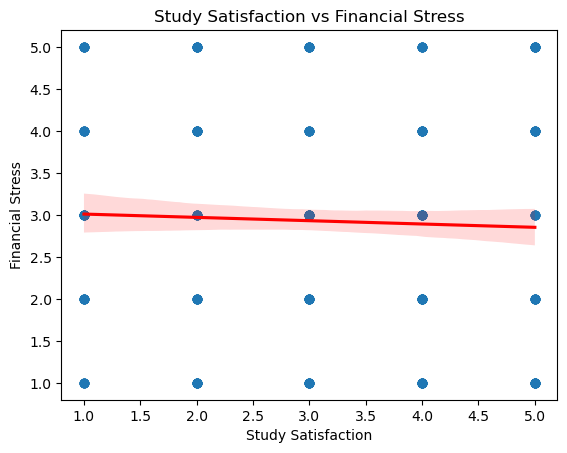

In [14]:
# Study satisfaction vs financial stress
sns.regplot(x='Study Satisfaction', y='Financial Stress', data=dataset, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Satisfaction vs Financial Stress')
plt.xlabel('Study Satisfaction')
plt.ylabel('Financial Stress')
plt.show()

In [15]:
dataset.columns = dataset.columns.str.strip()  # Remove leading/trailing spaces
print(dataset.columns)

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


C:\Users\pghat\AppData\Local\Temp\ipykernel_19000\568602858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Study Hours', y='Academic Pressure', data=dataset, palette='viridis')


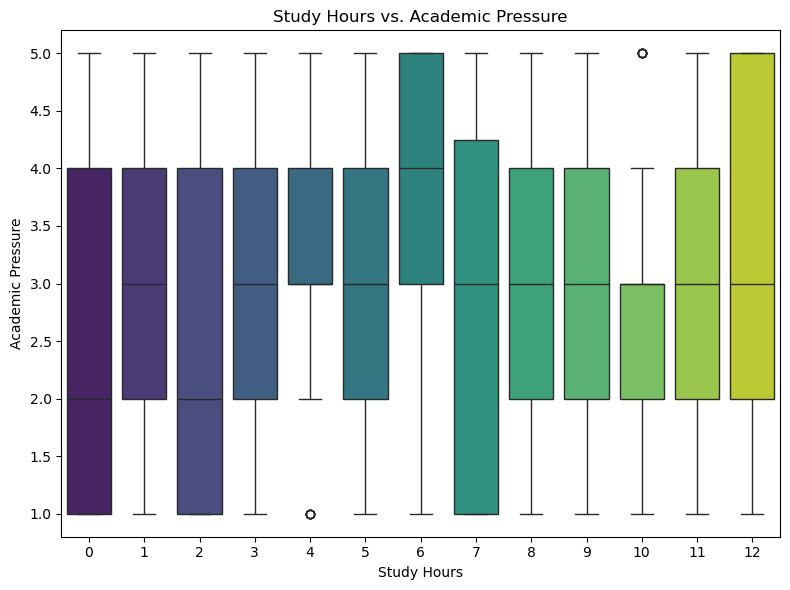

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Study Hours', y='Academic Pressure', data=dataset, palette='viridis')
plt.title('Study Hours vs. Academic Pressure')
plt.xlabel('Study Hours')
plt.ylabel('Academic Pressure')
plt.tight_layout()
plt.show()

C:\Users\pghat\AppData\Local\Temp\ipykernel_19000\3341943519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='rocket')


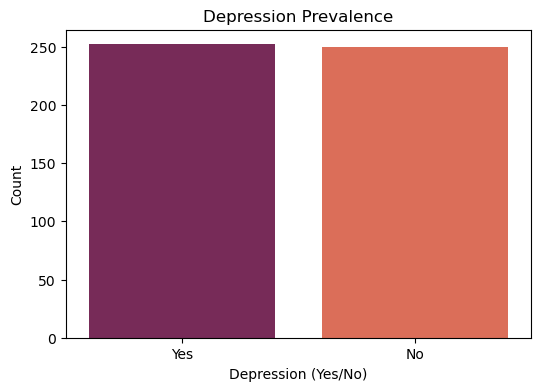

In [17]:
# Depression prevalence
depression_counts = dataset['Depression'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='rocket')
plt.title('Depression Prevalence')
plt.xlabel('Depression (Yes/No)')
plt.ylabel('Count')
plt.show()

In [18]:
!pip install skimpy

from skimpy import skim
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 502    │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50    ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                      │   0 │      0 │   26.24 │   4.897 │  18 │   22 │   26.5 │   30 │    34 │ ▇▆▆▇▇▇  │  │
│ │ Academic Pressure        │   0 │      0 │   3.004 │    1.39 │   1 │    2 │      3 │    4 │     5 │ ▆▆ ▇▆▆  │  │
│ │ Study Satisfaction       │   0 │      0 │   3.076 │   1.373 │   1 │    2 │      3 │    4 │     5 │ ▆▇ ▇▇▇  │  │
│ │ Study Hours              │   0 │      0 │   6.404 │   3.742 │   0 │    3 │      7 │   10 │    12 │ ▃▅▃▅▅▇  │  │
│ │ Financial Stress         │   0 │      0 │   2.928 │   1.425 │   1 │    2 │      3 │    4 │     5 │ ▇▇ ▇▇▇  │  │
│ └──────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴──────┴────────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                                │     0 │         0 │                        1 │                 502 │  │
│ │ Sleep Duration                        │     0 │         0 │                        3 │                1506 │  │
│ │ Dietary Habits                        │     0 │         0 │                        1 │                 502 │  │
│ │ Have you ever had suicidal thoughts ? │     0 │         0 │                        1 │                 502 │  │
│ │ Family History of Mental Illness      │     0 │         0 │                        1 │                 502 │  │
│ │ Depression                            │     0 │         0 │                        1 │                 502 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [19]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [20]:
!pip install seaborn
import matplotlib.pyplot as plt

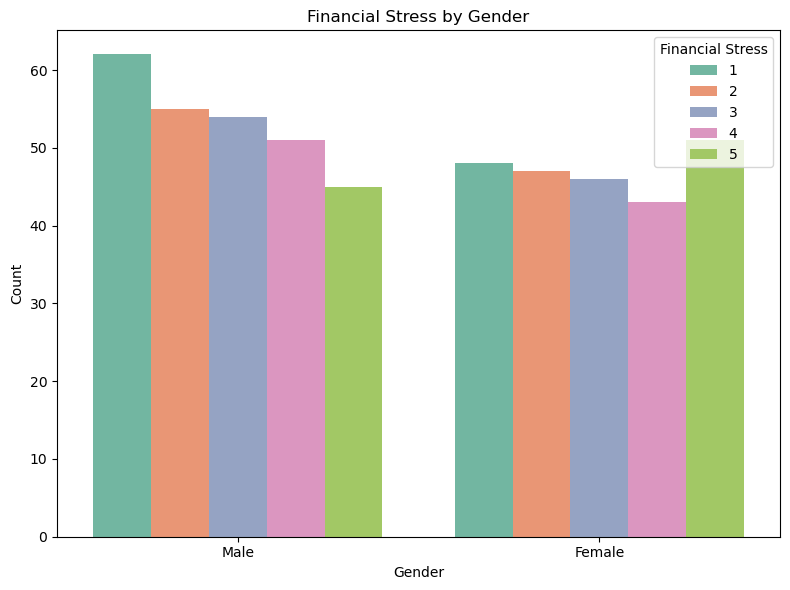

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Financial Stress', data=dataset, palette='Set2')
plt.title('Financial Stress by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

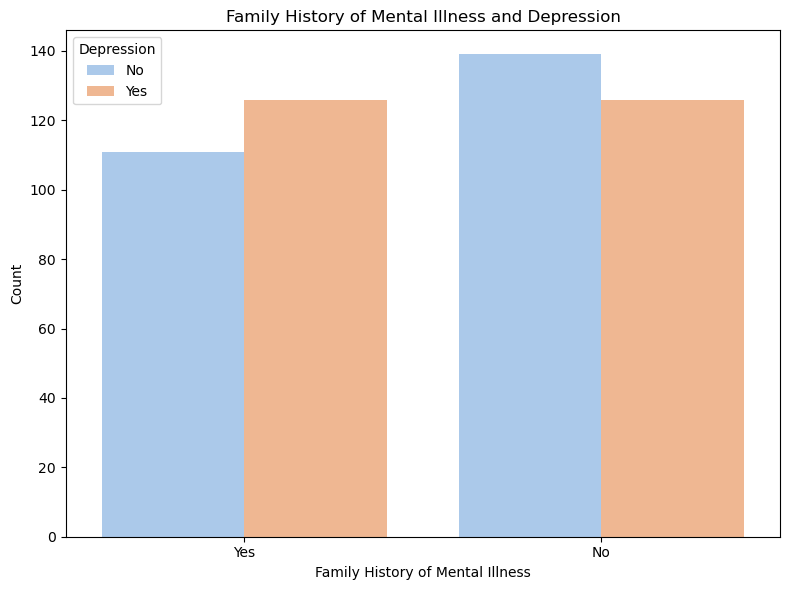

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=dataset, palette='pastel')
plt.title('Family History of Mental Illness and Depression')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

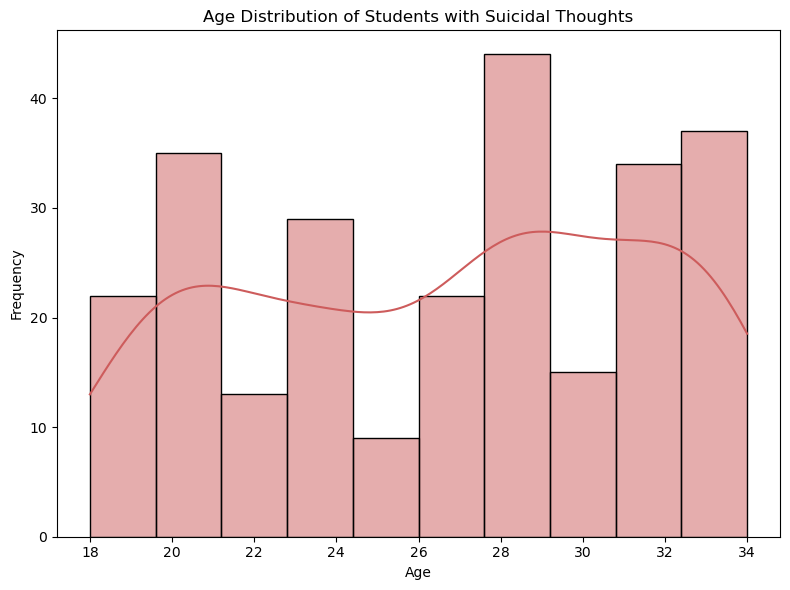

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(dataset[dataset['Have you ever had suicidal thoughts ?'] == 'Yes']['Age'], kde=True, color='indianred')
plt.title('Age Distribution of Students with Suicidal Thoughts')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

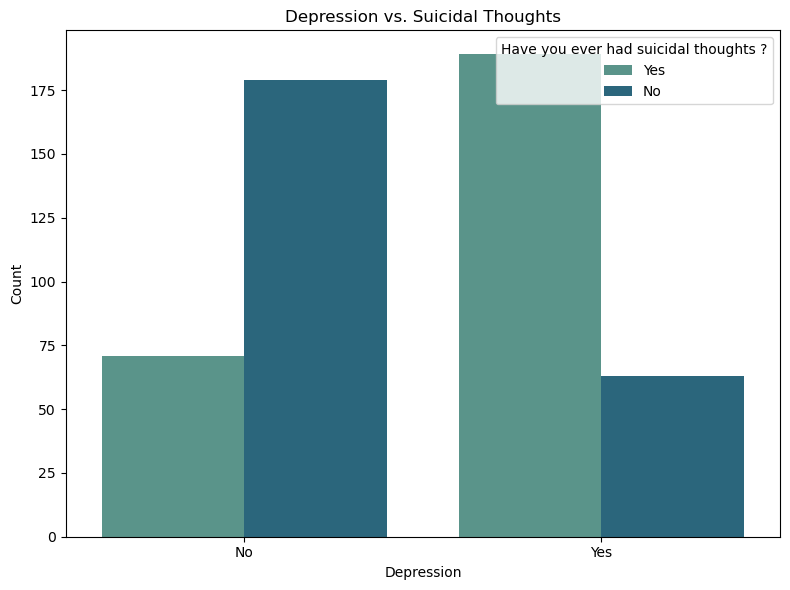

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Depression', hue='Have you ever had suicidal thoughts ?', data=dataset, palette='crest')
plt.title('Depression vs. Suicidal Thoughts')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

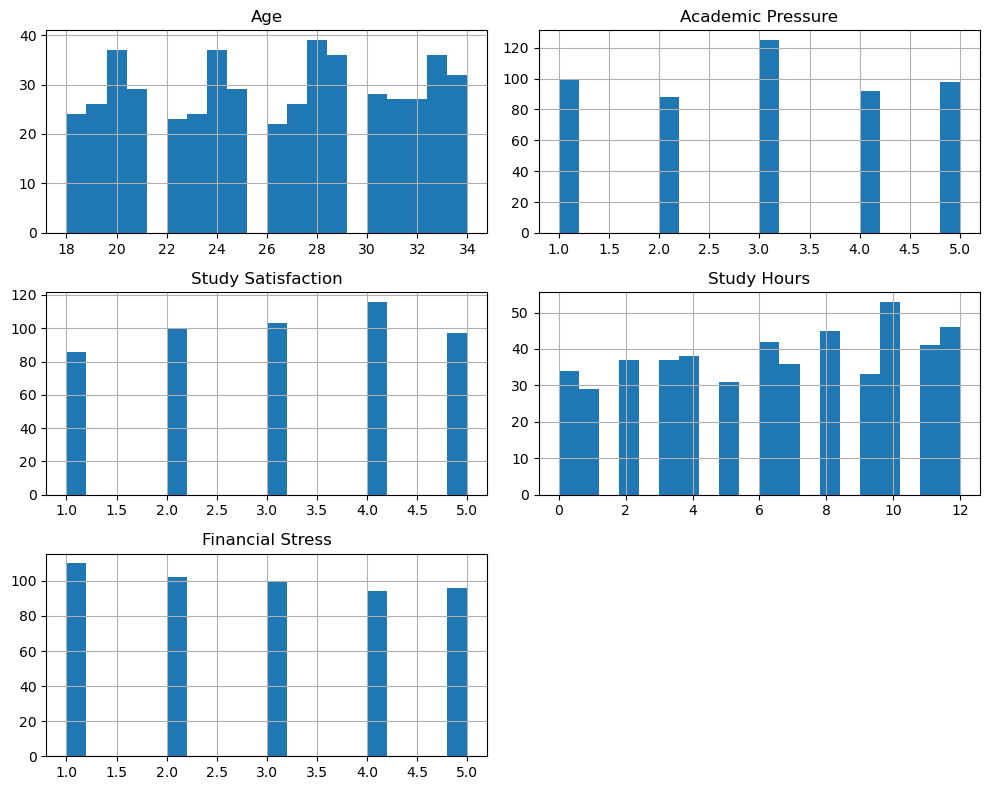

In [25]:
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
dataset[numerical_columns].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

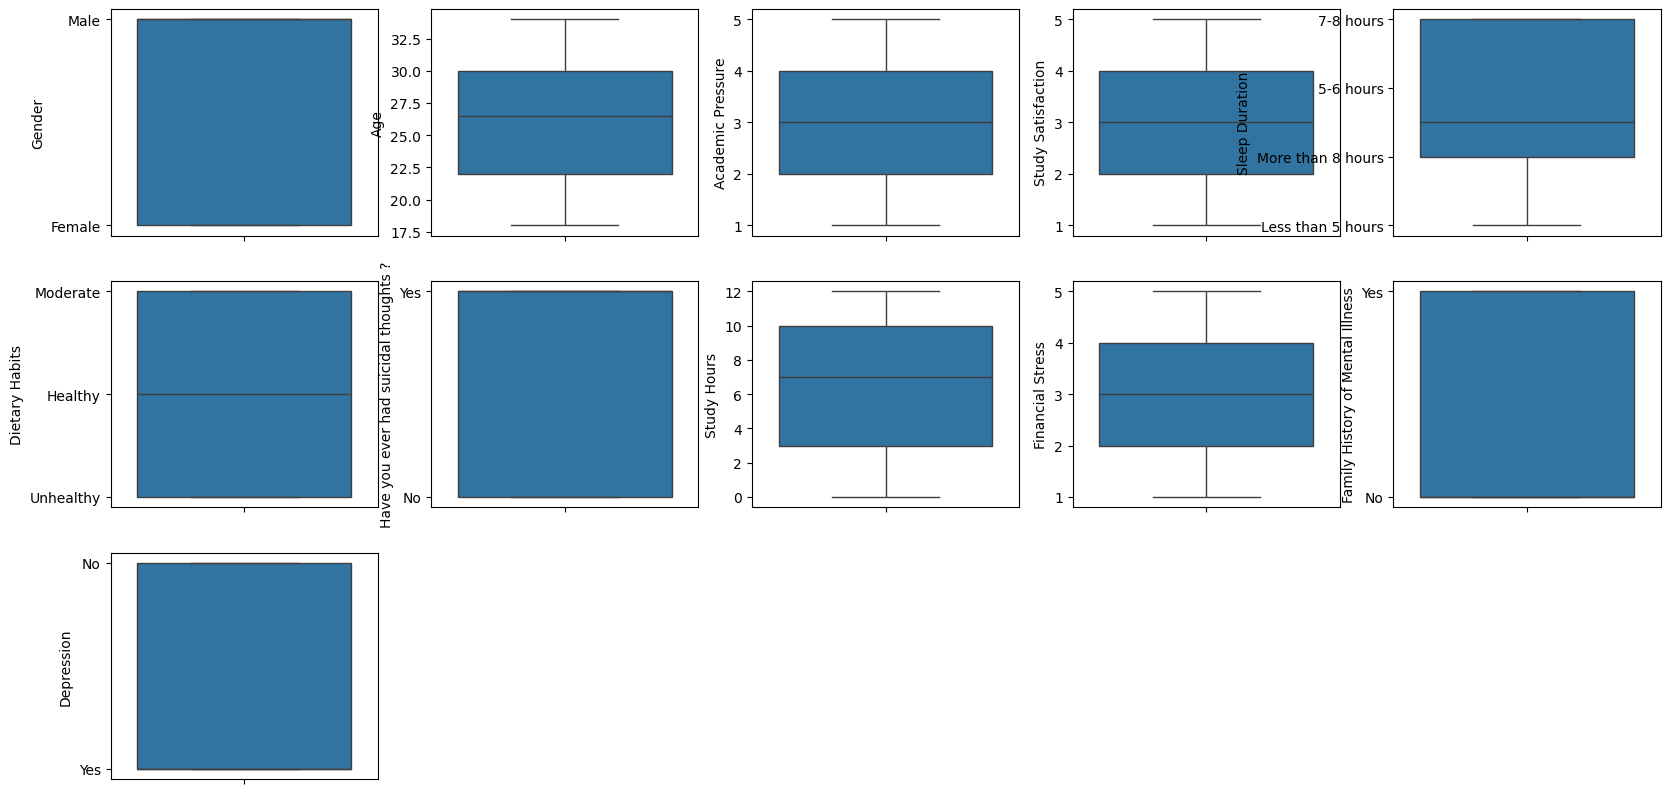

In [26]:
plt.figure(figsize=(20,10))

for i in range(len(dataset.columns)):

  plt.subplot(3, 5, i+1)

  sns.boxplot(dataset[dataset.columns[i]])

plt.show()

In [27]:
# Generate the report
profile = ProfileReport(dataset, title="Sentencing Data Profile", explorative=True)
profile.to_file("ydata_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]